In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
covid = pd.read_csv(r'C:\Users\Admin\Desktop\Projects_\Covid-19 Data Deaths and Vaccinations/covid_data_cleaned.csv')

In [34]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations
0,AFG,Asia,Afghanistan,24/02/20,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preliminary Observations on the dataset
total_cases - Total cases reported as on date  
new_cases - New cases reported on the date  
total_deaths - Total Deaths reported as on date  
new_deaths - New Deaths reported on the date  
total_vaccinations - Total Vaccinations provided as on date  

Formula used to calculate the total_vaccination is  

total_vaccinations = (people_fully_vaccinated*2) + (people_vaccinated - people_fully_vaccinated) + total_boosters  

Example (country - India / date - 03/05/2022)-  
1893322786 = (861965139 * 2) + (1004092762 - 861965139) + 27264885  

people_vaccinated - Count of people vaccinated as on date. This includes all those people who have received single as well as double doses of vaccine.  
people_fully_vaccinated - Count of people vaccinated as on date. This includes only those people who have received double doses of vaccine.  
total_boosters - Booster Doses given  
new_vaccinations - Vaccine given on the date

In [35]:
covid.dtypes

#date column to be converted into date datatype

iso_code                    object
continent                   object
location                    object
date                        object
total_cases                float64
new_cases                  float64
total_deaths               float64
new_deaths                 float64
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
total_boosters             float64
new_vaccinations           float64
dtype: object

In [36]:
covid.shape

(183583, 13)

# Convert date column datatype

In [37]:
covid['date_converted'] = pd.to_datetime(covid['date'], dayfirst=True)
covid.dtypes

iso_code                           object
continent                          object
location                           object
date                               object
total_cases                       float64
new_cases                         float64
total_deaths                      float64
new_deaths                        float64
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
total_boosters                    float64
new_vaccinations                  float64
date_converted             datetime64[ns]
dtype: object

# NULL Value Data Analysis

In [38]:
covid.isna().sum()

iso_code                        0
continent                   10723
location                        0
date                            0
total_cases                  6838
new_cases                    7051
total_deaths                25116
new_deaths                  25119
total_vaccinations         133572
people_vaccinated          136019
people_fully_vaccinated    138517
total_boosters             161152
new_vaccinations           142523
date_converted                  0
dtype: int64

In [39]:
covid[covid['continent'].isna()]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,date_converted
800,OWID_AFR,NaN,Africa,13/02/20,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2020-02-13
801,OWID_AFR,NaN,Africa,14/02/20,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2020-02-14
802,OWID_AFR,NaN,Africa,15/02/20,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2020-02-15
803,OWID_AFR,NaN,Africa,16/02/20,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2020-02-16
804,OWID_AFR,NaN,Africa,17/02/20,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2020-02-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181272,OWID_WRL,NaN,World,29/04/22,513146113.0,672698.0,6234308.0,2741.0,1.159138e+10,5.145990e+09,4.659818e+09,1.868386e+09,14822284.0,2022-04-29
181273,OWID_WRL,NaN,World,30/04/22,513541157.0,395044.0,6235644.0,1336.0,1.159691e+10,5.147077e+09,4.661731e+09,1.869359e+09,11112970.0,2022-04-30
181274,OWID_WRL,NaN,World,01/05/22,513865225.0,326740.0,6236553.0,915.0,1.161384e+10,5.150471e+09,4.665441e+09,1.871913e+09,10533471.0,2022-05-01
181275,OWID_WRL,NaN,World,02/05/22,514269025.0,463242.0,6238328.0,1783.0,1.162082e+10,5.150866e+09,4.666603e+09,1.876169e+09,9557989.0,2022-05-02


In [40]:
# Since these cases contribute to ~5% of the dataset, we can remove these cases and can continue with the analysis.

print(10723/183583)

0.05840954772500722


In [41]:
# Removed entries where iso_code contains owid
covid = covid[covid['iso_code'].str.contains('OWID') == False]

In [42]:
covid.isna().sum()

iso_code                        0
continent                       0
location                        0
date                            0
total_cases                  6514
new_cases                    6734
total_deaths                24577
new_deaths                  24780
total_vaccinations         127979
people_vaccinated          130404
people_fully_vaccinated    132730
total_boosters             154247
new_vaccinations           136863
date_converted                  0
dtype: int64

India started its vaccination on 16 January 2021.  
First vaccination started on 08 December 2020 (approx date).  
https://www.bbc.com/news/uk-55227325

In [43]:
print(round((covid[covid['date'] < '2021-01-01'].shape[0]/covid.shape[0]), 2)*100, '%')

65.0 %


37% of the data is of year 2020 when vaccine was not available, hence details for these rows will be blank.   
For remaning 63% dataset, vaccine was not immediately available for maximum countries and hence the values are blank.  

Hence it is safe to infer that there are very few entries in the dataset where vaccination details are not available and hence we can go ahead with blank vaccination details

In [44]:
covid[covid['total_cases'].isna()].isna().sum()

iso_code                      0
continent                     0
location                      0
date                          0
total_cases                6514
new_cases                  6514
total_deaths               6513
new_deaths                 6513
total_vaccinations         6223
people_vaccinated          6320
people_fully_vaccinated    6338
total_boosters             6463
new_vaccinations           6483
date_converted                0
dtype: int64

Wherever total_cases are blank, other details like vaccination and death details are also blank.  
Hence, we can remove these entries from the dataset.

In [45]:
covid.dropna(how='any', subset=['total_cases'], axis=0, inplace=True)
covid.isna().sum()

iso_code                        0
continent                       0
location                        0
date                            0
total_cases                     0
new_cases                     220
total_deaths                18064
new_deaths                  18267
total_vaccinations         121756
people_vaccinated          124084
people_fully_vaccinated    126392
total_boosters             147784
new_vaccinations           130380
date_converted                  0
dtype: int64

Based on sample check, it is observed that New cases are blank for those cases where there were no new cases were reported for the day. Hence for these entries, we can replace the null value with 0 value.

In [46]:
covid['new_cases'].fillna(value=0, axis = 0, inplace = True)
covid.isna().sum()

iso_code                        0
continent                       0
location                        0
date                            0
total_cases                     0
new_cases                       0
total_deaths                18064
new_deaths                  18267
total_vaccinations         121756
people_vaccinated          124084
people_fully_vaccinated    126392
total_boosters             147784
new_vaccinations           130380
date_converted                  0
dtype: int64

With the given dataset, we cannot conculde anything on the blank death values, hence we have taken assumption for the analysis purpose that there were no deaths on that particular day, and hence details are not available.  

So now this is our final cleaned dataset and we can use this dataset for further analysis

# Top Countries with maximum number fo cases Reported

The data provided is as on 03-05-2022.

Now to identify which countries got maximum covid cases, deaths due to covid and covid vaccination received as on date, we will only consider the date as 03-05-2022 and will consider only those columns which provide as on date details.

In [47]:
# We will create a copy of the existing dataset
covid_total_val = covid.copy()

# Now we will drop the unnecesary fields from the dataset 
covid_total_val.drop(axis = 1, labels = ['new_cases', 'new_deaths', 'new_vaccinations'], inplace = True)

# Now we will select only those rows where date is 03-05-2022
covid_total_val = covid_total_val[covid_total_val['date_converted'] == '2022-05-03']

# And we will set our location as index
covid_total_val.set_index('location', inplace=True)


In [48]:
# Since we are only presenting the top countries - will restrict the datset to 15
reported_cases = covid_total_val['total_cases'].sort_values(ascending = False)
reported_cases = reported_cases[:15]

In [49]:
# We will convert the numbers to Million
reported_cases = reported_cases.apply(lambda x: round(x/1000000, 1))

reported_cases

location
United States     81.5
India             43.1
Brazil            30.5
France            28.8
Germany           25.0
United Kingdom    22.1
Russia            17.9
South Korea       17.4
Italy             16.6
Turkey            15.0
Spain             12.0
Vietnam           10.7
Argentina          9.1
Netherlands        8.1
Japan              7.9
Name: total_cases, dtype: float64

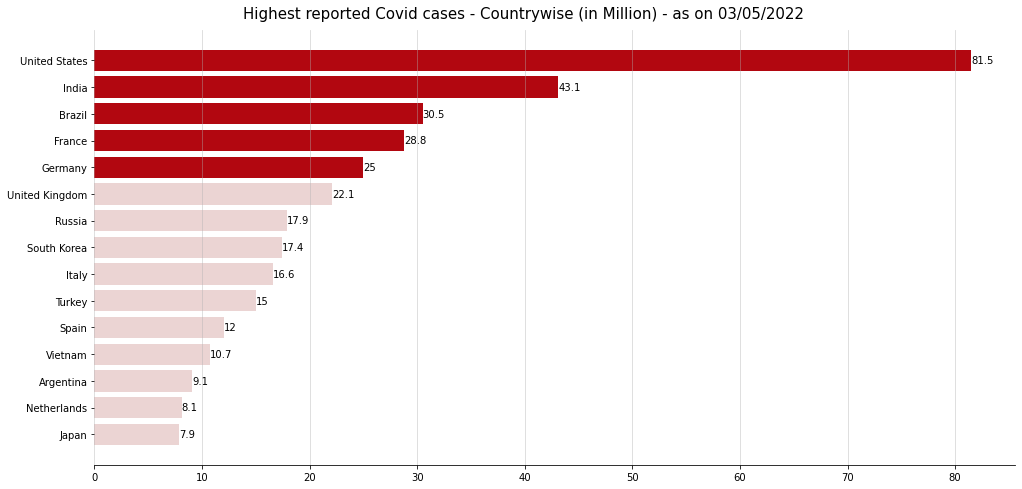

In [50]:
report_color = ['#ebd4d3' for _ in range(len(reported_cases))]

report_color[0] = '#b20710'
report_color[1] = '#b20710'
report_color[2] = '#b20710'
report_color[3] = '#b20710'
report_color[4] = '#b20710'

fig, ax = plt.subplots(1, 1, figsize = (16.5, 8))
ax.bar_label(ax.barh(reported_cases.index, reported_cases.values, label=reported_cases.values, color = report_color))
ax.invert_yaxis()

for i in ['top', 'left', 'right']:
    ax.spines[i].set_visible(False)

fig.text(0.25, 0.90,'Highest reported Covid cases - Countrywise (in Million) - as on 03/05/2022', fontdict={'fontsize':15})

ax.grid(axis = 'x', linestyle='-', alpha=0.5)

plt.show()

# Countries with maximum death reportes due to covid

Now we will do the same analysis for Death cases - 

In [51]:
death_cases = covid_total_val['total_deaths'].sort_values(ascending = False)
death_cases = death_cases[:15]

death_cases = death_cases.apply(lambda x: round(x/1000, 1))
death_cases

location
United States     994.7
Brazil            663.9
India             523.9
Russia            368.7
Mexico            324.3
Peru              212.9
United Kingdom    175.5
Italy             163.9
Indonesia         156.3
France            146.3
Iran              141.1
Colombia          139.8
Germany           135.9
Argentina         128.7
Poland            116.1
Name: total_deaths, dtype: float64

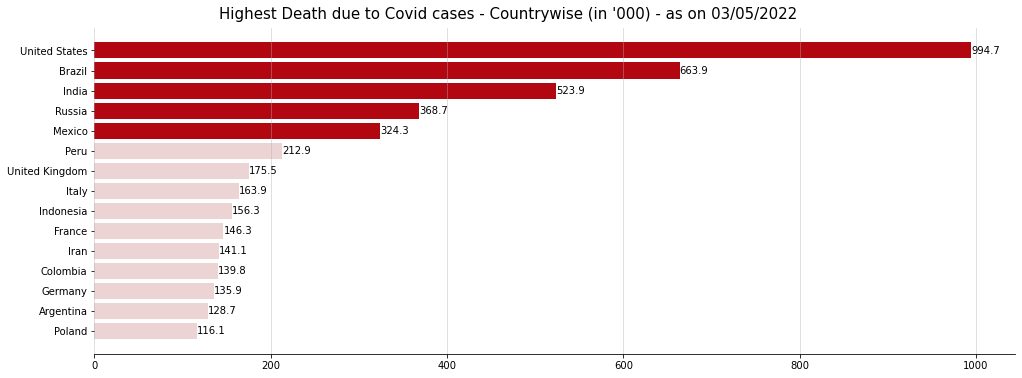

In [52]:
death_color = ['#ebd4d3' for _ in range(len(death_cases))]

death_color[0] = '#b20710'
death_color[1] = '#b20710'
death_color[2] = '#b20710'
death_color[3] = '#b20710'
death_color[4] = '#b20710'

fig, ax = plt.subplots(1, 1, figsize = (16.5, 6))
ax.bar_label(ax.barh(death_cases.index, death_cases.values, label=death_cases.values, color = death_color))
ax.invert_yaxis()

for i in ['top', 'left', 'right']:
    ax.spines[i].set_visible(False)

fig.text(0.23, 0.90,'Highest Death due to Covid cases - Countrywise (in \'000) - as on 03/05/2022', 
         fontdict={'fontsize':15})

ax.grid(axis = 'x', linestyle='-', alpha=0.5)

plt.show()

# Top Countries with Vaccination Drives

In [53]:
total_vaccine = covid_total_val['total_vaccinations'].sort_values(ascending = False)
total_vaccine = total_vaccine[:15]

total_vaccine = total_vaccine.apply(lambda x: round(x/1000000, 1))
total_vaccine

location
China          3347.6
India          1893.3
Brazil          430.4
Indonesia       401.3
Russia          166.5
Iran            149.0
Turkey          147.5
Italy           136.9
Thailand        133.4
South Korea     123.7
Argentina        98.9
Malaysia         70.3
Australia        57.3
Chile            53.0
Taiwan           52.7
Name: total_vaccinations, dtype: float64

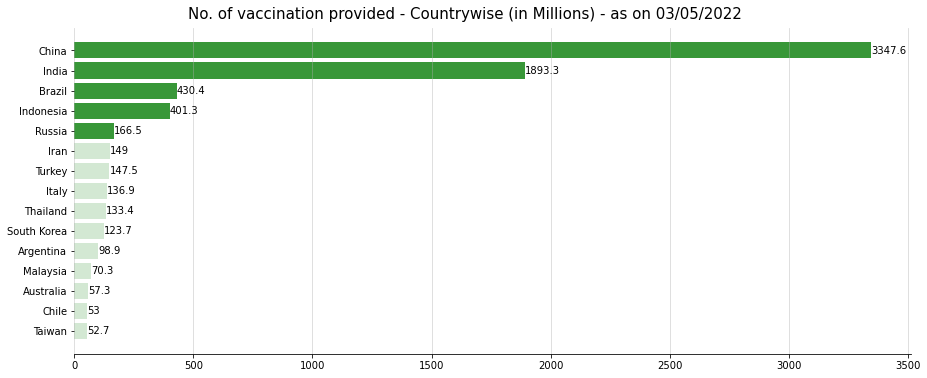

In [54]:
vaccine_color = ['#d3e8d3' for _ in range(len(total_vaccine))]
# 4ea24e bddcbd
vaccine_color[0] = '#389738'
vaccine_color[1] = '#389738'
vaccine_color[2] = '#389738'
vaccine_color[3] = '#389738'
vaccine_color[4] = '#389738'

fig, ax = plt.subplots(1, 1, figsize = (15, 6))
ax.bar_label(ax.barh(total_vaccine.index, total_vaccine.values, label=total_vaccine.values, color = vaccine_color))
ax.invert_yaxis()

for i in ['top', 'left', 'right']:
    ax.spines[i].set_visible(False)

fig.text(0.23, 0.90,'No. of vaccination provided - Countrywise (in Millions) - as on 03/05/2022', 
         fontdict={'fontsize':15})

ax.grid(axis = 'x', linestyle='-', alpha=0.5)

plt.show()

# Top Countries - Fully Vaccinated population

In [55]:
people_full_vaccine = covid_total_val['people_fully_vaccinated'].sort_values(ascending = False)
people_full_vaccine = people_full_vaccine[:15]

people_full_vaccine = people_full_vaccine.apply(lambda x: round(x/1000000, 1))
people_full_vaccine

location
India           862.0
Indonesia       165.4
Brazil          164.2
Russia           73.6
Iran             57.6
Turkey           53.0
Thailand         51.3
Italy            47.9
South Korea      44.6
Argentina        37.2
Malaysia         26.7
Australia        21.5
Nepal            19.6
Taiwan           18.7
South Africa     18.3
Name: people_fully_vaccinated, dtype: float64

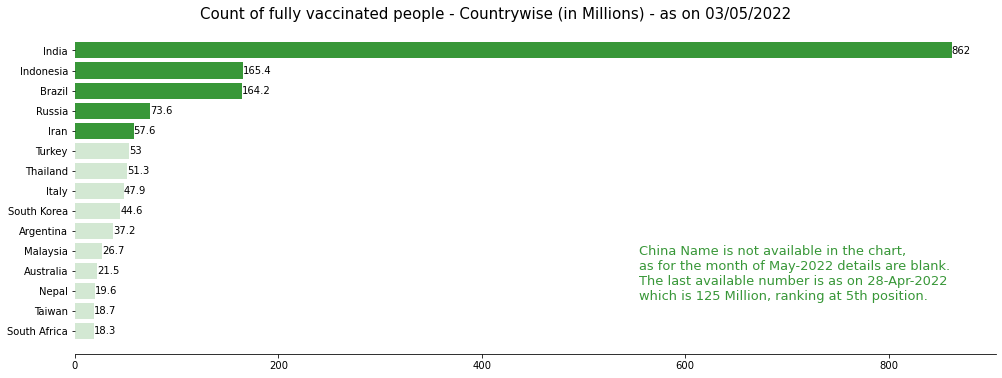

In [56]:
people_color = ['#d3e8d3' for _ in range(len(people_full_vaccine))]
# 4ea24e bddcbd
people_color[0] = '#389738'
people_color[1] = '#389738'
people_color[2] = '#389738'
people_color[3] = '#389738'
people_color[4] = '#389738'

fig, ax = plt.subplots(1, 1, figsize = (16.5, 6))
ax.bar_label(ax.barh(people_full_vaccine.index, people_full_vaccine.values, label=people_full_vaccine.values, 
                     color = people_color))
ax.invert_yaxis()

for i in ['top', 'left', 'right']:
    ax.spines[i].set_visible(False)

fig.text(0.23, 0.90,'Count of fully vaccinated people - Countrywise (in Millions) - as on 03/05/2022', 
         fontdict={'fontsize':15})

fig.text(0.6, 0.25, 
'''China Name is not available in the chart, 
as for the month of May-2022 details are blank. 
The last available number is as on 28-Apr-2022 
which is 125 Million, ranking at 5th position.'''

, fontsize=13, fontweight='light', color = '#389738')

# ax.grid(axis = 'x', linestyle='-', alpha=0.5)

plt.show()

From the above data charts this can be concluded, that India and USA were the worst hit countries of Covid and has seen the maximum number of casualties.

However, these are also the countries who have derived the vaccination drives succcessfully. 

Although this is described in absolute numbers and because of population count results are slightly skewed, accurate results can be drawn by adding population count and finding the %age of reported covid cases and vaccinated people on the Population Count.

# Monthly Covid Trend

In [57]:
covid['Month_Year_new'] = pd.to_datetime(covid['date_converted'], format='%b-%y').dt.to_period('M')
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,date_converted,Month_Year_new
0,AFG,Asia,Afghanistan,24/02/20,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-24,2020-02
1,AFG,Asia,Afghanistan,25/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,2020-02
2,AFG,Asia,Afghanistan,26/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-26,2020-02
3,AFG,Asia,Afghanistan,27/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-27,2020-02
4,AFG,Asia,Afghanistan,28/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-28,2020-02


In [58]:
covid.dtypes

iso_code                           object
continent                          object
location                           object
date                               object
total_cases                       float64
new_cases                         float64
total_deaths                      float64
new_deaths                        float64
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
total_boosters                    float64
new_vaccinations                  float64
date_converted             datetime64[ns]
Month_Year_new                  period[M]
dtype: object

In [59]:
covid_new = covid.copy()
covid_new.set_index('location', inplace=True)
covid_new

,iso_code,continent,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,date_converted,Month_Year_new
location,,,,,,,,,,,,,,
Afghanistan,AFG,Asia,24/02/20,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-24,2020-02
Afghanistan,AFG,Asia,25/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,2020-02
Afghanistan,AFG,Asia,26/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-26,2020-02
Afghanistan,AFG,Asia,27/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-27,2020-02
Afghanistan,AFG,Asia,28/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-28,2020-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZWE,Africa,29/04/22,247842.0,58.0,5469.0,0.0,10304899.0,5864940.0,3667392.0,772567.0,19472.0,2022-04-29,2022-04
Zimbabwe,ZWE,Africa,30/04/22,247875.0,33.0,5469.0,0.0,10313861.0,5866832.0,3672516.0,774513.0,8962.0,2022-04-30,2022-04
Zimbabwe,ZWE,Africa,01/05/22,247911.0,36.0,5469.0,0.0,10320810.0,5867908.0,3675272.0,777630.0,6949.0,2022-05-01,2022-05


In [60]:
# Below 3 columns can be used to analyse monthly covid trend 
daily_trend = covid_new.pivot_table(values = ['new_cases', 'new_deaths', 'new_vaccinations'], 
                  index = 'Month_Year_new', aggfunc='sum')


daily_trend = daily_trend.apply(lambda x: round(x/100000, 1))
daily_trend

,new_cases,new_deaths,new_vaccinations
Month_Year_new,,,
2020-01,0.1,0.0,0.0
2020-02,0.8,0.0,0.0
2020-03,7.8,0.4,0.0
2020-04,24.4,2.0,0.0
2020-05,29.1,1.5,0.0
2020-06,43.1,1.4,0.0
2020-07,71.1,1.7,0.0
2020-08,79.4,1.8,0.0
2020-09,85.0,1.6,0.0


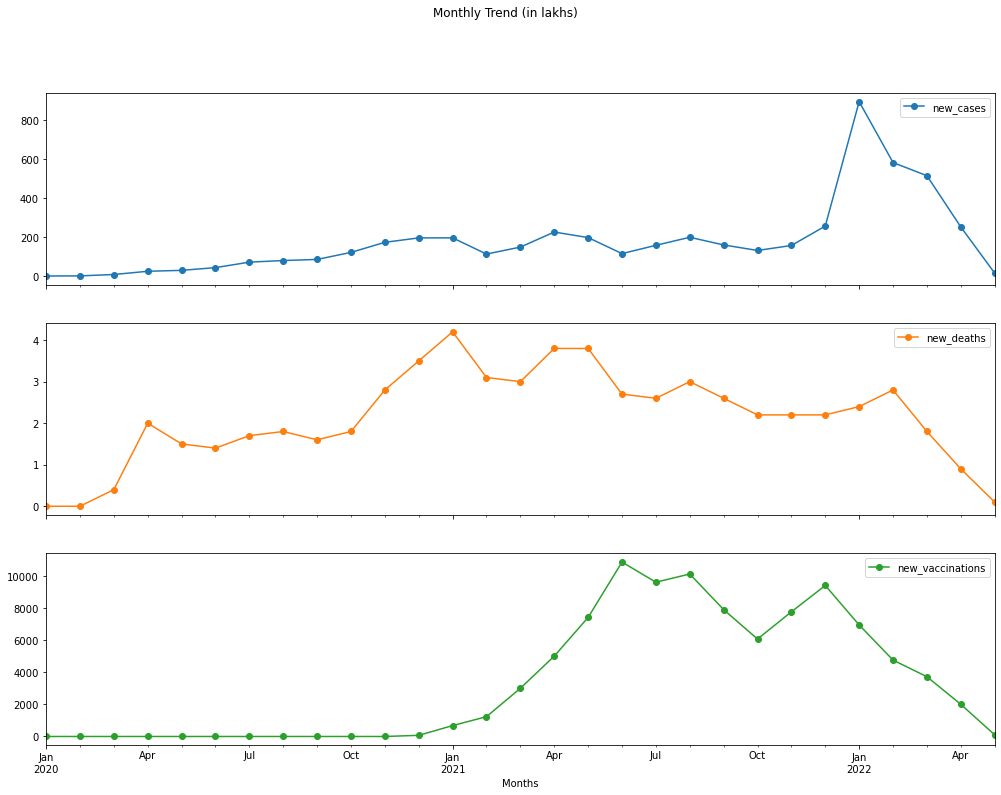

In [61]:
daily_trend.plot(subplots=True, figsize=(17, 12), kind = 'line', marker='o', title = 'Monthly Trend (in lakhs)')

# labeling the axes
plt.xlabel('Months')


# rotating the tick values of x-axis

plt.show()

There is spike noted for new covid cases in Jan 2022.

This spike is noted in USA which contributes to the 23% of the total covid cases reported world wide.